In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [5]:
df = pd.read_csv('train_ortho.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [7]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Abnormal    210
Normal      100
Name: class, dtype: int64

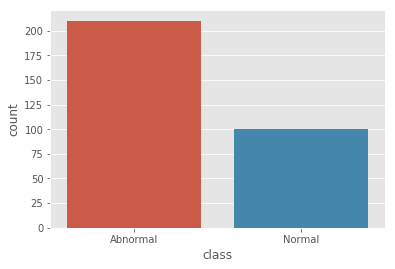

In [10]:
sns.countplot(df['class'],data=df)
df['class'].value_counts()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
x,y = df.loc[:,df.columns != 'class'],df.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('prediction {}'.format(prediction))

prediction ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abn

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('knn with k = 3 accuracy : ',knn.score(x_test,y_test))

knn with k = 3 accuracy :  0.8602150537634409


Best Accuracy is 0.9139784946236559 with k=19


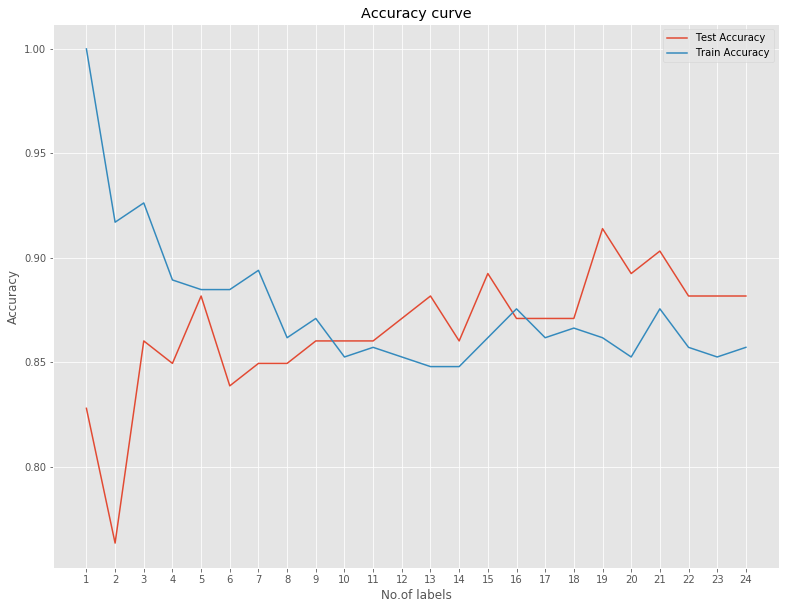

In [17]:
iterations = np.arange(1,25)
train_accuracy = []
test_accuracy = []
for i,j in enumerate(iterations):
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

plt.figure(figsize=[13,10])
plt.plot(iterations,test_accuracy,label = 'Test Accuracy')
plt.plot(iterations,train_accuracy,label='Train Accuracy')

plt.legend()
plt.title('Accuracy curve')
plt.xlabel('No.of labels')
plt.ylabel('Accuracy')
plt.xticks(iterations)
print('Best Accuracy is {} with k={}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [18]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test,prediction)

array([[54,  5],
       [ 8, 26]], dtype=int64)

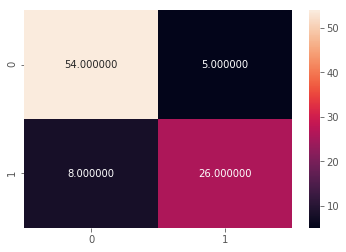

In [23]:
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='f')